In [4]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

n_samples = 10000
data = pd.DataFrame(
    {"col_0":np.random.uniform(size = n_samples),
     "col_1":np.random.uniform(size = n_samples)
    }
)

import data_plotting as dp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate circle

/Users/we56sc/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


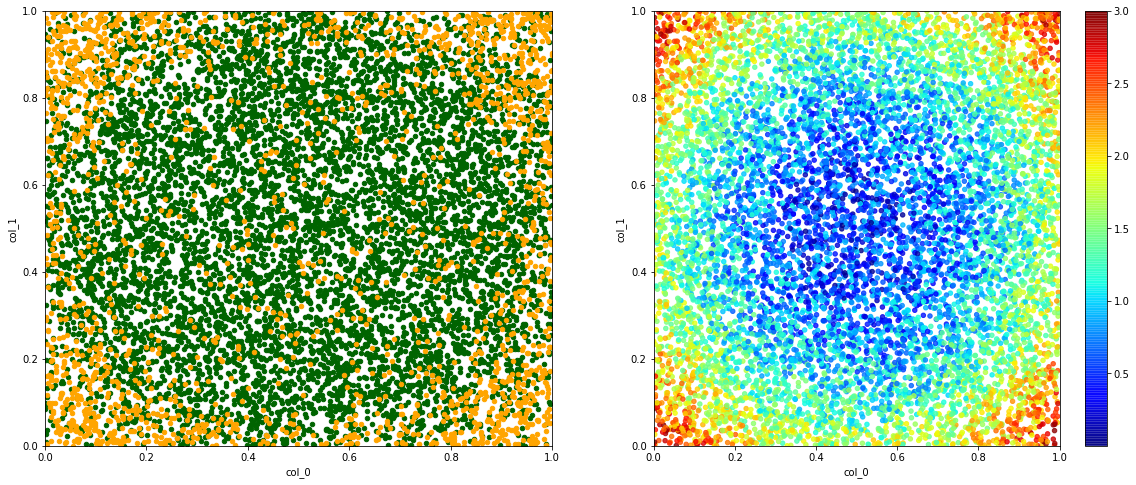

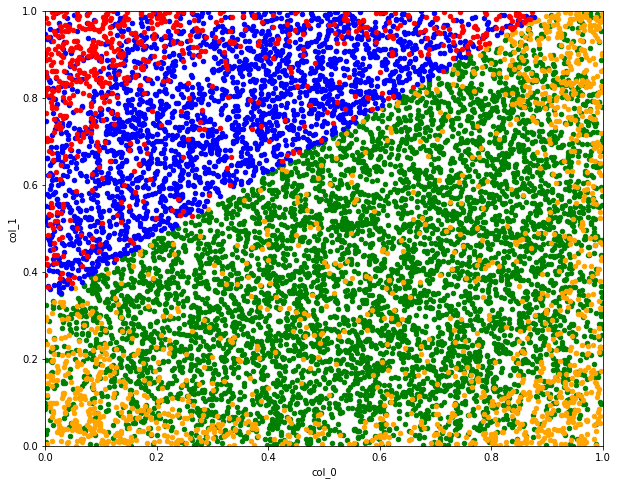

In [16]:
expressions_target = {}
# linear component
expressions_target['non_linear'] = {
    'weight':0.9,
    'expr':'(col_0-0.5)**2 +(col_1-0.5)**2'
}
expressions_target['uniform_noise'] = {'weight':1.3}


expressions_selection = {}
# linear component
expressions_selection['linear'] = {
    'weight':1,
    'expr':'0.9*(col_0) -1.2*(col_1)-0.2'
}
expressions_selection['uniform_noise'] = {'weight':0}

df_score_target = target.get_target_and_contributions(data, 
                                               expressions= expressions_target, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.2,
                                               drop_features = False
                                              )

df_score_target['y'] = dp.shuffle_y(df_score_target['y'], nshuff=int(0.05*n_samples))

df_score_selection = target.get_target_and_contributions(data, 
                                               expressions= expressions_selection, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.7,
                                               drop_features = False
                                              )

circle_exp_data = dp.concat_data(df_score_target,df_score_selection)




dp.plot_data(circle_exp_data)

# plot_selected_vs_all_data(
#     circle_exp_data[circle_exp_data['is_selected']==1],
#     circle_exp_data
# )

dp.plot_selected_vs_rejected(circle_exp_data, all_in_one=True)

circle_exp_data.to_csv("circle.csv", index = False)

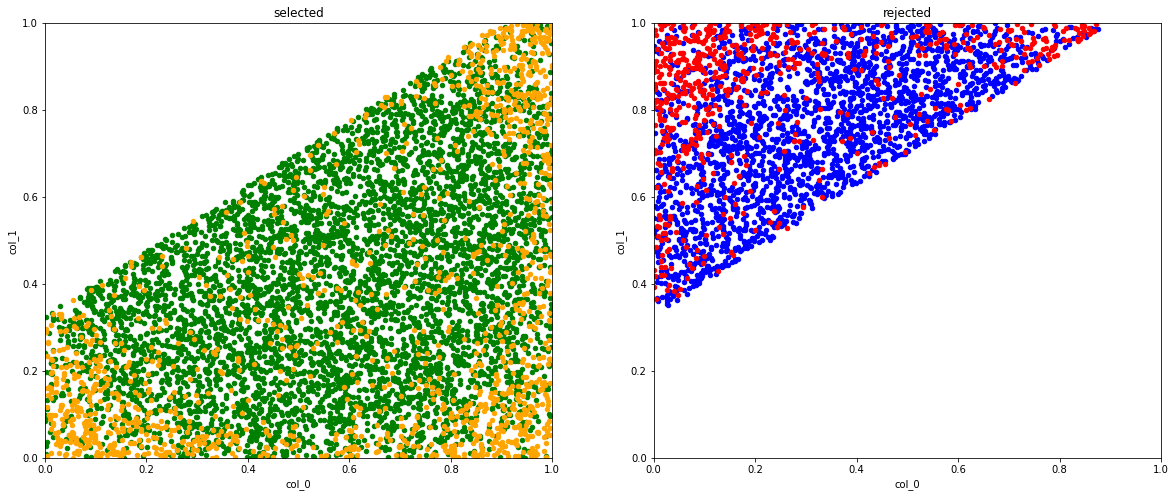

In [49]:
dp.plot_selected_vs_rejected(circle_exp_data, all_in_one=False)

In [ ]:
circle_exp_data.head()

### Parabolic

/Users/we56sc/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


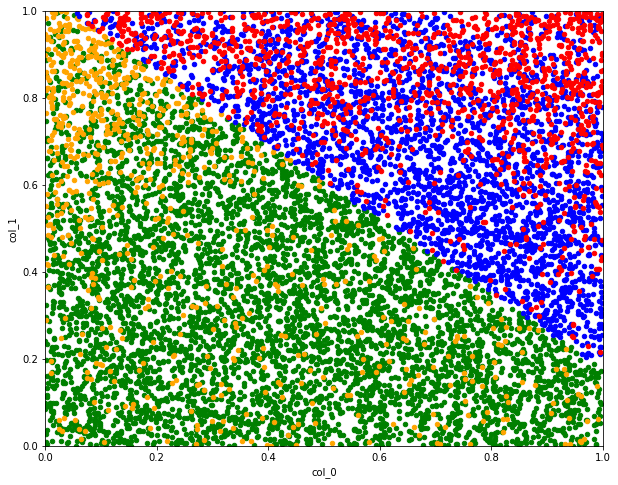

In [48]:
expressions_target = {}
# non linear component
expressions_target['non_linear'] = {
    'weight':0.1,
    'expr':'(col_0-0.5)**2+(col_1-0.5)'
}
expressions_target['uniform_noise'] = {'weight':0.9}
# expressions_target['gaussian_noise'] = {'weight':10000.9}


expressions_selection = {}
# linear component
expressions_selection['linear'] = {
    'weight':1,
    'expr':'-0.6*(col_0) -0.7*(col_1)+0'
}
expressions_selection['uniform_noise'] = {'weight':0}

df_score_target = target.get_target_and_contributions(data, 
                                               expressions= expressions_target, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.2,
                                               drop_features = False
                                              )

df_score_target['y'] = dp.shuffle_y(df_score_target['y'], nshuff=int(0.05*n_samples))

df_score_selection = target.get_target_and_contributions(data, 
                                               expressions= expressions_selection, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.6,
                                               drop_features = False
                                              )

parabolic_exp_data = dp.concat_data(df_score_target,df_score_selection)

# dp.plot_data(parabolic_exp_data)
# plot_selected_vs_all_data(
#     parabolic_exp_data[parabolic_exp_data['is_selected']==1],
#     parabolic_exp_data
# )
dp.plot_selected_vs_rejected(parabolic_exp_data, all_in_one=True)

parabolic_exp_data.to_csv("parabolic.csv", index = False)

### Same sample, different relation ships

/Users/we56sc/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/we56sc/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


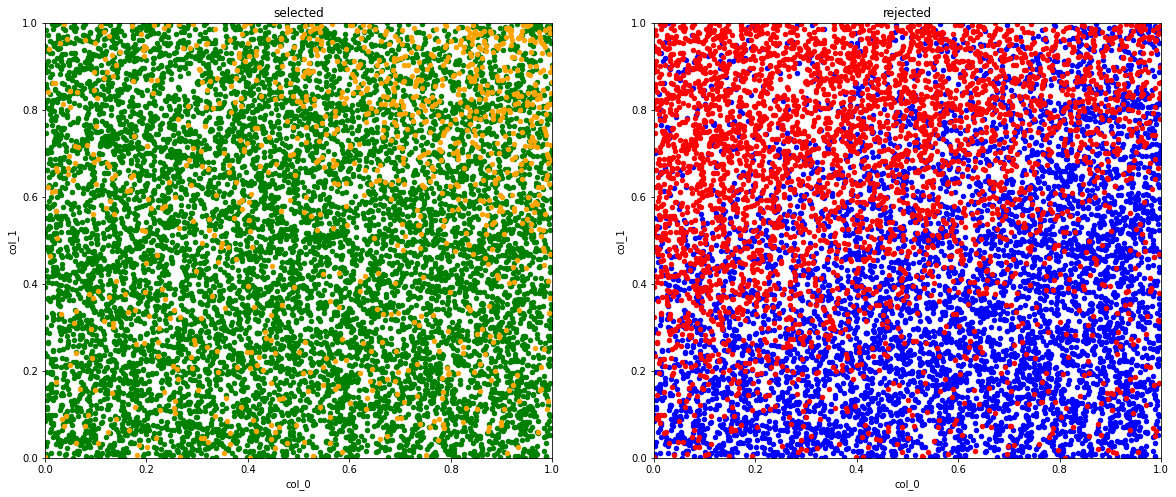

In [14]:
expressions_selected = {}
# non linear component
expressions_selected['linear'] = {
    'weight':0.1,
    'expr':'0.7*(col_0-0.5) +(col_1-0.5)'
}
expressions_selected['uniform_noise'] = {'weight':0.9}
# expressions_target['gaussian_noise'] = {'weight':10000.9}


expressions_rejected = {}
# non linear component
expressions_rejected['linear'] = {
    'weight':0.1,
    'expr':'-0.7*(col_0+0.5) +(col_1-0.5)'
}
expressions_rejected['uniform_noise'] = {'weight':0.9}
# expressions_target['gaussian_noise'] = {'weight':10000.9}

df_score_selected = target.get_target_and_contributions(data, 
                                               expressions= expressions_selected, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.1,
                                               drop_features = False
                                              )

df_score_selected['y'] = dp.shuffle_y(df_score_selected['y'], nshuff=int(0.05*n_samples))

df_score_rejected = target.get_target_and_contributions(data, 
                                               expressions= expressions_rejected, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.4,
                                               drop_features = False
                                              )

df_score_rejected['y'] = dp.shuffle_y(df_score_rejected['y'], nshuff=int(0.05*n_samples))

df_score_selected['is_selected']=1

df_score_rejected['is_selected']=0

total_df = pd.concat([df_score_selected,df_score_rejected])

dp.plot_selected_vs_rejected(total_df, all_in_one=False)

total_df.to_csv("same.csv", index = False)